# Spam filtering

In [2]:
import pandas as pd
df = pd.read_csv('./SMSSpamCollection', delimiter='\t', header=None)
print(df.head())

      0                                                  1
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...


In [3]:
print('Number of spam messages: %s' % df[df[0] == 'spam'][0].count())
print('Number of ham messages: %s' % df[df[0] == 'ham'][0].count())

Number of spam messages: 747
Number of ham messages: 4825


In [4]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model.logistic import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score

X = df[1].values
y = df[0].values
X_train_raw, X_test_raw, y_train, y_test = train_test_split(X, y)
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(X_train_raw)
X_test = vectorizer.transform(X_test_raw)
classifier = LogisticRegression()
classifier.fit(X_train, y_train)
predictions = classifier.predict(X_test)
for i, prediction in enumerate(predictions[:5]):
    print('Predicted: %s, message: %s' % (prediction, X_test_raw[i]))

Predicted: ham, message: Faith makes things possible,Hope makes things work,Love makes things beautiful,May you have all three this Christmas!Merry Christmas!
Predicted: ham, message: MY NEW YEARS EVE WAS OK. I WENT TO A PARTY WITH MY BOYFRIEND. WHO IS THIS SI THEN HEY
Predicted: spam, message: Congratulations ur awarded 500 of CD vouchers or 125gift guaranteed & Free entry 2 100 wkly draw txt MUSIC to 87066 TnCs www.Ldew.com1win150ppmx3age16
Predicted: ham, message: * Was thinking about chuckin ur red green n black trainners 2 save carryin them bac on train
Predicted: ham, message: In xam hall boy asked girl Tell me the starting term for dis answer I can den manage on my own After lot of hesitation n lookin around silently she said THE! intha ponnungale ipaditan;)


[[4 1]
 [2 3]]


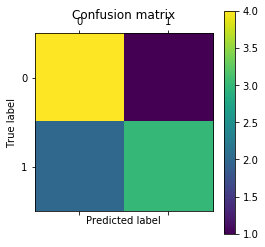

In [5]:
# Binary classification performance metrics
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

y_test = [0, 0, 0, 0, 0, 1, 1, 1, 1, 1]
y_pred = [0, 1, 0, 0, 0, 0, 0, 1, 1, 1]
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)
plt.matshow(confusion_matrix)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [6]:
# Accuracy
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model.logistic import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

df = pd.read_csv('./sms.csv')
X_train_raw, X_test_raw, y_train, y_test = train_test_split(df['message'], df['label'],random_state=11)
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(X_train_raw)
X_test = vectorizer.transform(X_test_raw)
classifier = LogisticRegression()
classifier.fit(X_train, y_train)
scores = cross_val_score(classifier, X_train, y_train, cv=5)
print('Accuracies: %s' % scores)
print('Mean accuracy: %s' % np.mean(scores))

Accuracies: [ 0.95221027  0.95454545  0.96172249  0.96052632  0.95209581]
Mean accuracy: 0.956220068309


In [7]:
precisions = cross_val_score(classifier, X_train, y_train, cv=5,scoring='precision')
print('Precision: %s' % np.mean(precisions))
recalls = cross_val_score(classifier, X_train, y_train, cv=5, scoring='recall')
print('Recall: %s' % np.mean(recalls))

Precision: 0.992542742398
Recall: 0.683605030275


In [8]:
f1s = cross_val_score(classifier, X_train, y_train, cv=5, scoring='f1')
print('F1 score: %s' % np.mean(f1s))

F1 score: 0.809067846627


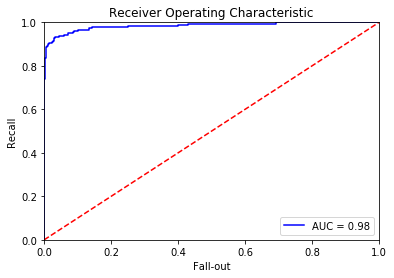

In [9]:
predictions = classifier.predict_proba(X_test)
false_positive_rate, recall, thresholds = roc_curve(y_test, predictions[:, 1])
roc_auc = auc(false_positive_rate, recall)
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, recall, 'b', label='AUC = %0.2f' % roc_auc)
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.ylabel('Recall')
plt.xlabel('Fall-out')
plt.show()

# Tuning models with grid search

In [10]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model.logistic import LogisticRegression
from sklearn.grid_search import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, accuracy_score


pipeline = Pipeline([
    ('vect', TfidfVectorizer(stop_words='english')),
    ('clf', LogisticRegression())
])
parameters = {
    'vect__max_df': (0.25, 0.5, 0.75),
    'vect__stop_words': ('english', None),
    'vect__max_features': (2500, 5000, None),
    'vect__ngram_range': ((1, 1), (1, 2)),
    'vect__use_idf': (True, False),
    'clf__penalty': ('l1', 'l2'),
    'clf__C': (0.01, 0.1, 1, 10),
}

if __name__ == "__main__":
    df = pd.read_csv('./SMSSpamCollection', delimiter='\t', header=None)
    X = df[1].values
    y = df[0].values
    label_encoder = LabelEncoder()
    y = label_encoder.fit_transform(y)
    X_train, X_test, y_train, y_test = train_test_split(X, y)
    
    grid_search = GridSearchCV(pipeline, parameters, n_jobs=-1, verbose=1, scoring='accuracy', cv=3)
    grid_search.fit(X_train, y_train)
    
    print('Best score: %0.3f' % grid_search.best_score_)
    print('Best parameters set:')
    best_parameters = grid_search.best_estimator_.get_params()
    for param_name in sorted(parameters.keys()):
        print('\t%s: %r' % (param_name, best_parameters[param_name]))
        
    predictions = grid_search.predict(X_test)
    print('Accuracy: %s' % accuracy_score(y_test, predictions))
    print('Precision: %s' % precision_score(y_test, predictions))
    print('Recall: %s' % recall_score(y_test, predictions))

E:\Anc\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
E:\Anc\lib\site-packages\sklearn\grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


Fitting 3 folds for each of 576 candidates, totalling 1728 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    9.1s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:   31.7s
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:   53.4s
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 1728 out of 1728 | elapsed:  2.9min finished


Best score: 0.984
Best parameters set:
	clf__C: 10
	clf__penalty: 'l2'
	vect__max_df: 0.5
	vect__max_features: 2500
	vect__ngram_range: (1, 2)
	vect__stop_words: None
	vect__use_idf: True
Accuracy: 0.985642498205
Precision: 0.994949494949
Recall: 0.912037037037


# Multi-class classification

In [10]:
import pandas as pd
df = pd.read_csv('./train.tsv', header=0, delimiter='\t')
print(df.count())

PhraseId      156060
SentenceId    156060
Phrase        156060
Sentiment     156060
dtype: int64


In [11]:
print(df.head())

   PhraseId  SentenceId                                             Phrase  \
0         1           1  A series of escapades demonstrating the adage ...   
1         2           1  A series of escapades demonstrating the adage ...   
2         3           1                                           A series   
3         4           1                                                  A   
4         5           1                                             series   

   Sentiment  
0          1  
1          2  
2          2  
3          2  
4          2  


In [12]:
print(df['Phrase'].head(10))

0    A series of escapades demonstrating the adage ...
1    A series of escapades demonstrating the adage ...
2                                             A series
3                                                    A
4                                               series
5    of escapades demonstrating the adage that what...
6                                                   of
7    escapades demonstrating the adage that what is...
8                                            escapades
9    demonstrating the adage that what is good for ...
Name: Phrase, dtype: object


In [13]:
print(df['Sentiment'].describe())

count    156060.000000
mean          2.063578
std           0.893832
min           0.000000
25%           2.000000
50%           2.000000
75%           3.000000
max           4.000000
Name: Sentiment, dtype: float64


In [14]:
print(df['Sentiment'].value_counts())

2    79582
3    32927
1    27273
4     9206
0     7072
Name: Sentiment, dtype: int64


In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model.logistic import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

df = pd.read_csv('./train.tsv', header=0, delimiter='\t')
X, y = df['Phrase'], df['Sentiment'].as_matrix()
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5)
pipeline = Pipeline([
    ('vect', TfidfVectorizer(stop_words='english')),
    ('clf', LogisticRegression())
]) 
parameters = {
    'vect__max_df': (0.25, 0.5),
    'vect__ngram_range': ((1, 1), (1, 2)),
    'vect__use_idf': (True, False),
    'clf__C': (0.1, 1, 10),
}
grid_search = GridSearchCV(pipeline, parameters, n_jobs=-1, verbose=1, scoring='accuracy')
grid_search.fit(X_train, y_train)
print('Best score: %0.3f' % grid_search.best_score_)
print('Best parameters set:')
best_parameters = grid_search.best_estimator_.get_params()
for param_name in sorted(parameters.keys()):
    print('t%s: %r' % (param_name, best_parameters[param_name]))

Fitting 3 folds for each of 24 candidates, totalling 72 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done  72 out of  72 | elapsed:  4.0min finished


Best score: 0.619
Best parameters set:
tclf__C: 10
tvect__max_df: 0.25
tvect__ngram_range: (1, 2)
tvect__use_idf: False


In [16]:
#Multi-class classification performance metrics

predictions = grid_search.predict(X_test)

print('Accuracy: %s' % accuracy_score(y_test, predictions))
print('Confusion Matrix:')
print(confusion_matrix(y_test, predictions))
print('Classification Report:')
print(classification_report(y_test, predictions))

Accuracy: 0.636280917596
Confusion Matrix:
[[ 1133  1733   608    70     7]
 [  824  6122  5991   514    31]
 [  206  3346 32590  3588   158]
 [   28   456  6550  8164  1304]
 [    2    39   494  2432  1640]]
Classification Report:
             precision    recall  f1-score   support

          0       0.52      0.32      0.39      3551
          1       0.52      0.45      0.49     13482
          2       0.70      0.82      0.76     39888
          3       0.55      0.49      0.52     16502
          4       0.52      0.36      0.42      4607

avg / total       0.62      0.64      0.62     78030



# Multi-label classification and problem transformation

In [18]:
import numpy as np
from sklearn.metrics import hamming_loss, jaccard_similarity_score

print(hamming_loss(np.array([[0.0, 1.0], [1.0, 1.0]]), np.array([[0.0, 1.0], [1.0, 1.0]])))

0.0


In [19]:
print(hamming_loss(np.array([[0.0, 1.0], [1.0, 1.0]]), np.array([[1.0, 1.0], [1.0, 1.0]])))

0.25


In [20]:
print(hamming_loss(np.array([[0.0, 1.0], [1.0, 1.0]]), np.array([[1.0, 1.0], [0.0, 1.0]])))

0.5


In [21]:
print(jaccard_similarity_score(np.array([[0.0, 1.0], [1.0, 1.0]]), np.array([[0.0, 1.0], [1.0, 1.0]])))

1.0


In [22]:
print(jaccard_similarity_score(np.array([[0.0, 1.0], [1.0, 1.0]]), np.array([[1.0, 1.0], [1.0, 1.0]])))

0.75


In [23]:
print(jaccard_similarity_score(np.array([[0.0, 1.0], [1.0, 1.0]]), np.array([[1.0, 1.0], [0.0, 1.0]])))

0.5
